In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X+bias

In [8]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [9]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_labels, c = 'b', s=8, label = "Training data")
    plt.scatter(test_data, test_labels, c='g', s=8, label = "Testing Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=8, label = "Predictions")
    
    plt.legend(prop={'size':14})

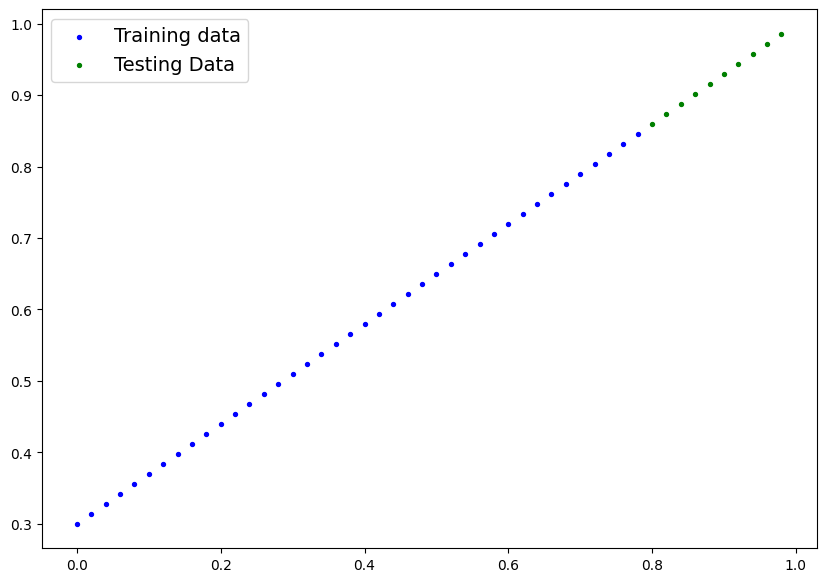

In [10]:
plot_predictions()

In [13]:

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = 1,
                                      out_features = 1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [14]:
torch.manual_seed(42)

In [15]:
model_1 = LinearRegressionModelV2()

In [18]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [20]:
next(model_1.parameters()).device

device(type='cpu')

Digression: Iterating over generator object

In [29]:
for item in model_1.parameters():
    print(item)

Parameter containing:
tensor([[0.7645]], requires_grad=True)
Parameter containing:
tensor([0.8300], requires_grad=True)


In [30]:
next(model_1.parameters())

Parameter containing:
tensor([[0.7645]], requires_grad=True)

In [32]:
model_1.parameters()

<generator object Module.parameters at 0x7f9f091fdfc0>

In [41]:
model_1.state_dict()['linear_layer.weight'].item()

0.7645385265350342

Digression over

In [31]:
# Loss function
loss_fn = nn.L1Loss()
# Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), 
                            lr = 0.01)

In [42]:
# Training Loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_1.train()
    #forward pass
    y_pred = model_1(X_train)
    #loss calc
    loss = loss_fn(y_pred, y_train)
    #optimizer zero grad
    optimizer.zero_grad()
    #backpropagation
    loss.backward()
    #Optimizer step
    optimizer.step()
    #Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Training Loss: {loss} | Test Loss: {test_loss} | Weight: {model_1.state_dict()['linear_layer.weight'].item()} | Bias: {model_1.state_dict()['linear_layer.bias'].item()}")

Epoch: 0 | Training Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089 | Weight: 0.7606385350227356 | Bias: 0.8200079202651978
Epoch: 10 | Training Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963 | Weight: 0.7216386198997498 | Bias: 0.7200080156326294
Epoch: 20 | Training Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085 | Weight: 0.6826387047767639 | Bias: 0.620008111000061
Epoch: 30 | Training Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062 | Weight: 0.6436387896537781 | Bias: 0.5200082063674927
Epoch: 40 | Training Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949 | Weight: 0.6046388745307922 | Bias: 0.4200083017349243
Epoch: 50 | Training Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003 | Weight: 0.5872389078140259 | Bias: 0.3525083065032959
Epoch: 60 | Training Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355 | Weight: 0.6024590134620667 | Bias: 0.34100836515426636
Epoch: 70 | Training Loss: 0.016517987474799156 | Test

In [44]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds.numpy()

array([[0.8599564 ],
       [0.87389255],
       [0.8878287 ],
       [0.90176487],
       [0.91570103],
       [0.9296373 ],
       [0.9435735 ],
       [0.95750964],
       [0.9714458 ],
       [0.9853821 ]], dtype=float32)

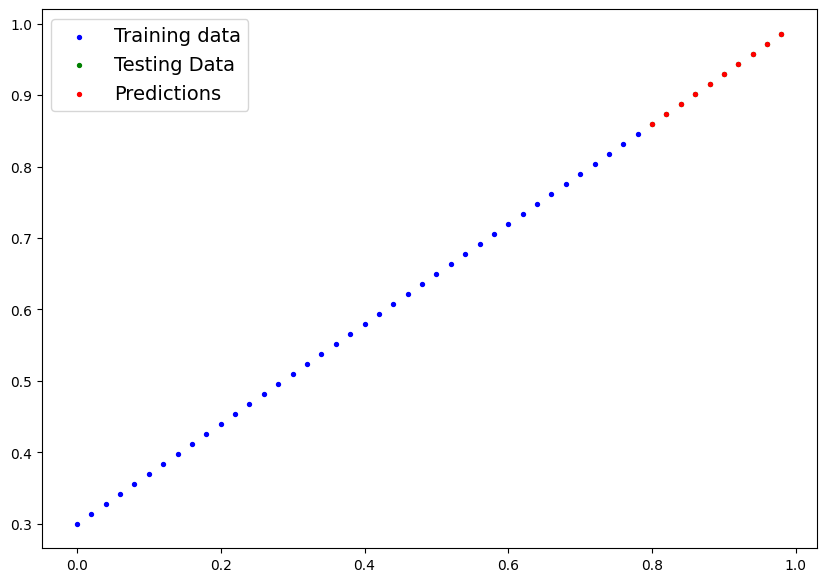

In [46]:
plot_predictions(predictions = y_preds.numpy())

In [49]:
torch.save(model_1.state_dict(), './models/02_linear_regression_v2.pth')

In [50]:
model_2 = LinearRegressionModelV2()

In [51]:
model_2.load_state_dict(torch.load('./models/02_linear_regression_v2.pth'))

<All keys matched successfully>

In [53]:
model_2.eval()

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [54]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

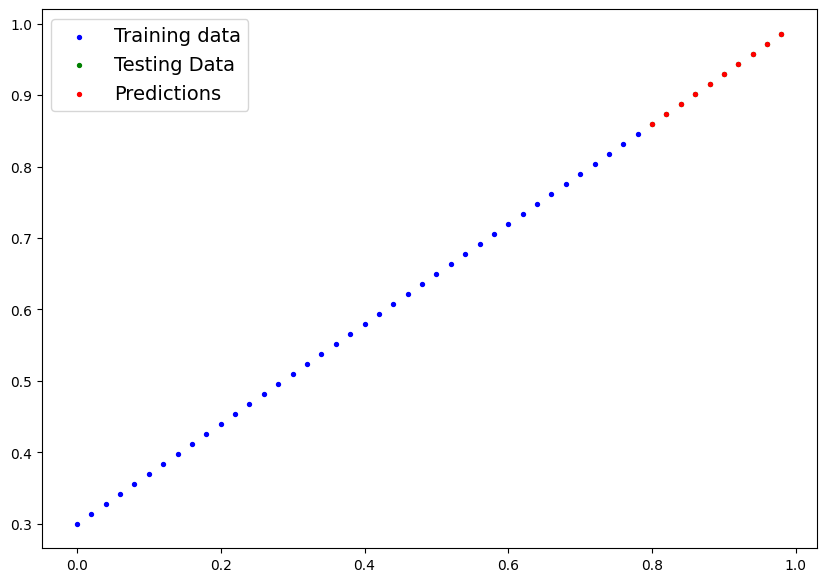

In [55]:
plot_predictions(predictions = y_preds.numpy())

In [56]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [57]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])